In [86]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns', 30)
df = load_breast_cancer()
x = pd.DataFrame(df.data, columns=[df.feature_names])
y = pd.Series(df.target)

In [87]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
print(x.shape, y.shape)

(569, 30) (569,)


Verificando o balanceamento de classes

In [89]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

#Definindo valores que serão testados na LogisticRegression
valores_C = np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
regularizacao = ['l1', 'l2']
valores_grid = {'C': valores_C, 'penalty': regularizacao}

#Criação do modelo
modelo = LogisticRegression()

#Criando os grid
grid_reg_log = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5)
grid_reg_log.fit(x, y)

#Imprimindo a melhor acurácia e os melhores parâmetros:
print('Melhor acurácia: ', grid_reg_log.best_score_)
print('Parâmetro C: ', grid_reg_log.best_estimator_.C)
print('Regularização: ', grid_reg_log.best_estimator_.penalty)

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Melhor acurácia:  0.9508150908244062
Parâmetro C:  2.0
Regularização:  l2


C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
55 fits failed out of a total of 110.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by set

# Confusion Matrix

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Separando os dados entre treino e teste:
X_treino, X_teste, y_teste, y_teste = train_test_split(x,y, test_size=0.3, random_state=9)

#Criação do modelo:
modelo = LogisticRegression(penalty='l2', C=2)
modelo.fit(x,y)

#Score:
resultado = modelo.score(X_teste, y_teste)
print('Acurácia: ', resultado)


Acurácia:  0.9415204678362573


C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
predicao = modelo.predict(X_teste)

In [116]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_teste, predicao)
print(matriz)
# Positivo 1, Negativo 0 

[[ 54   8]
 [  2 107]]


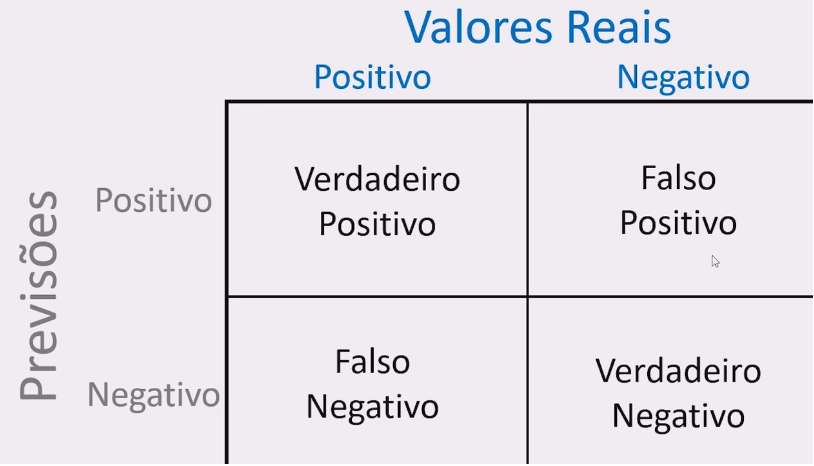

In [117]:
predicao = modelo.predict_proba(X_teste)
predicao

array([[3.03230923e-02, 9.69676908e-01],
       [4.55237583e-01, 5.44762417e-01],
       [9.99999993e-01, 7.31626524e-09],
       [1.46373894e-01, 8.53626106e-01],
       [7.77239732e-03, 9.92227603e-01],
       [1.00000000e+00, 2.98763708e-10],
       [9.99999999e-01, 5.39005447e-10],
       [9.99998812e-01, 1.18777764e-06],
       [9.91436598e-03, 9.90085634e-01],
       [9.99327384e-01, 6.72616059e-04],
       [9.99999981e-01, 1.89366018e-08],
       [1.99492606e-02, 9.80050739e-01],
       [1.48553902e-03, 9.98514461e-01],
       [7.29968325e-03, 9.92700317e-01],
       [9.98113865e-01, 1.88613525e-03],
       [1.05572466e-01, 8.94427534e-01],
       [2.86090094e-03, 9.97139099e-01],
       [2.89185076e-01, 7.10814924e-01],
       [4.05489465e-04, 9.99594511e-01],
       [1.58706143e-03, 9.98412939e-01],
       [1.00000000e+00, 2.26012891e-23],
       [1.53772512e-03, 9.98462275e-01],
       [9.24246355e-03, 9.90757536e-01],
       [9.99937939e-01, 6.20610068e-05],
       [3.977210

In [118]:
probs = predicao[:, 1]

In [119]:
from sklearn.metrics import roc_curve, accuracy_score
fpr, tpr, tresholds = roc_curve(y_teste, probs)

In [120]:
print(f'TPR:{tpr}')
print(f'FPR:{fpr}')
print(f'Tresholds:{tresholds}')

TPR:[0.         0.00917431 0.72477064 0.72477064 0.9266055  0.9266055
 0.96330275 0.96330275 0.97247706 0.97247706 0.98165138 0.98165138
 0.99082569 0.99082569 1.         1.        ]
FPR:[0.         0.         0.         0.01612903 0.01612903 0.0483871
 0.0483871  0.06451613 0.06451613 0.08064516 0.08064516 0.16129032
 0.16129032 0.24193548 0.24193548 1.        ]
Tresholds:[           inf 9.99872498e-01 9.70746055e-01 9.69676908e-01
 8.17092569e-01 7.88202336e-01 7.47263488e-01 7.25658066e-01
 7.10814924e-01 6.20903596e-01 6.19530691e-01 3.36225996e-01
 3.08834947e-01 1.16937814e-01 9.29871343e-02 1.25594123e-28]


In [121]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_teste, probs)

0.9899378514353359

# Testando outros valores de treshold

In [99]:
threshold = 9.29871343e-02
y_pred = (probs >= threshold).astype(int)

# Avaliando a performance do modelo
accuracy = accuracy_score(y_teste, y_pred)
conf_matrix = confusion_matrix(y_teste, y_pred)

In [100]:
accuracy

0.9064327485380117

In [101]:
conf_matrix

array([[ 47,  15],
       [  1, 108]], dtype=int64)